# ASSIGNMENT 3 - Team 8

## Headers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split

## Assumptions

* According to the pre-processing problem statement, we have assumed that we have to first prune out the transactions with the movie ratings less than 2. Further to that, we have pruned out those transactions where the Users have rated less than 10 different movies
* In Part-3: We're using common sorted rules rather than all rules

## Data preprocessing

In [12]:
df = pd.read_csv("ml-latest-small/ratings.csv")

# rating of the movies should be greater than 2
df = df[df["rating"] > 2]

# keeping only those users with more than 10 movies rated
user_counts = df.groupby("userId")["movieId"].count()
valid_users = user_counts[user_counts > 10].index
df = df[df["userId"].isin(valid_users)]

# breaking the data into train and test (20% for testing for EACH user)
train_set = {}
test_set = {}

for user, group in df.groupby("userId"):
    train, test = train_test_split(group, test_size=0.2, random_state=42)
    train_set[user] = list(train["movieId"])
    test_set[user] = list(test["movieId"])

user_movies = df.groupby("userId")["movieId"].apply(list).to_dict()

In [13]:
# new data for Training
train_set

{1: [1136,
  1031,
  2054,
  2090,
  3450,
  1270,
  1408,
  1517,
  1967,
  661,
  441,
  2018,
  2944,
  3034,
  163,
  1197,
  543,
  349,
  1777,
  1127,
  1210,
  70,
  1032,
  1920,
  2141,
  2137,
  1097,
  2174,
  2991,
  4006,
  553,
  223,
  596,
  527,
  780,
  2058,
  1927,
  2450,
  1024,
  2899,
  2872,
  1220,
  736,
  1473,
  2143,
  1224,
  2478,
  480,
  3439,
  2987,
  2078,
  1,
  6,
  1222,
  940,
  1580,
  1793,
  2139,
  2571,
  1348,
  1275,
  2528,
  2406,
  1552,
  608,
  2105,
  1080,
  367,
  2366,
  2502,
  592,
  216,
  3740,
  2797,
  101,
  500,
  2161,
  3671,
  3702,
  2459,
  50,
  2046,
  590,
  2542,
  1089,
  2093,
  3527,
  2648,
  1198,
  2692,
  1092,
  919,
  2353,
  733,
  2048,
  423,
  2641,
  2596,
  1256,
  673,
  3729,
  943,
  1445,
  2654,
  804,
  2329,
  2470,
  47,
  1644,
  1029,
  2115,
  3273,
  2949,
  3448,
  1009,
  1240,
  593,
  110,
  1804,
  1377,
  1265,
  3168,
  3386,
  1298,
  151,
  231,
  1060,
  2997,
  2099,
  316,


## Functions Implemented

In [4]:
# Association rule mining functions
def support(movies):
    matching_users = [
        user for user in train_set if all(movie in train_set[user] for movie in movies)
    ]
    return len(matching_users) / len(train_set)


def generate_frequent_itemsets(k, minsup, prev_frequent_itemsets):
    if k == 1:
        return [([movie], sup) for movie, sup in asr_movies_sup.items()]

    candidates = set()
    for i in range(len(prev_frequent_itemsets)):
        for j in range(i + 1, len(prev_frequent_itemsets)):
            itemset1 = set(prev_frequent_itemsets[i][0])
            itemset2 = set(prev_frequent_itemsets[j][0])
            new_itemset = itemset1.union(itemset2)
            if len(new_itemset) == k:
                candidates.add(tuple(sorted(new_itemset)))

    return [
        (list(itemset), support(itemset))
        for itemset in candidates
        if support(itemset) >= minsup
    ]


def generate_association_rules(frequent_itemsets, minconf):
    rules = []
    for itemset, sup in frequent_itemsets:
        if len(itemset) > 1:  # We need at least 2 items to form a rule
            for i in range(len(itemset)):
                antecedent = [itemset[i]]
                consequent = [item for j, item in enumerate(itemset) if j != i]
                conf = sup / support(antecedent)
                if conf >= minconf:
                    rules.append((antecedent, consequent, sup, conf))
    return rules

## Part 1

In [5]:
# setting our own parameters
minsup = 0.09
minconf = 0.1

# getting unique movies in the training set
movies_train_unique = set(
    movie for user_movies in train_set.values() for movie in user_movies
)

# calculating support for individual movies
asr_movies_sup = {
    movie: support([movie])
    for movie in movies_train_unique
    if support([movie]) >= minsup
}

# generating frequent itemsets
frequent_itemsets = [generate_frequent_itemsets(1, minsup, [])]
k = 2
while True:
    frequent_k = generate_frequent_itemsets(k, minsup, frequent_itemsets[-1])
    if not frequent_k:
        break
    frequent_itemsets.append(frequent_k)
    k += 1

# now generating association rules
all_rules = []
for itemsets in frequent_itemsets[1:]:  # Start from 2-itemsets
    all_rules.extend(generate_association_rules(itemsets, minconf))

# filtering and keeping rules where X contains a single movie
final_rules = [rule for rule in all_rules if len(rule[0]) == 1]

# printing all associations found
sorted_rules = sorted(final_rules, key=lambda x: x[3], reverse=True)

print(f"Number of association rules found: {len(sorted_rules)}")

# Print all rules, sorted by confidence
for rule in sorted_rules:
    print(f"{rule[0]} -> {rule[1]} (Support: {rule[2]:.4f}, Confidence: {rule[3]:.4f})")

Number of association rules found: 1979
[6365] -> [2571] (Support: 0.0923, Confidence: 0.7887)
[153] -> [592] (Support: 0.1170, Confidence: 0.7802)
[1221] -> [858] (Support: 0.1219, Confidence: 0.7789)
[1527] -> [2571] (Support: 0.1120, Confidence: 0.7727)
[2628] -> [2571] (Support: 0.1005, Confidence: 0.7722)
[60069] -> [2571] (Support: 0.0939, Confidence: 0.7703)
[1240] -> [2571] (Support: 0.1252, Confidence: 0.7677)
[5445] -> [2571] (Support: 0.1054, Confidence: 0.7619)
[778] -> [296] (Support: 0.0972, Confidence: 0.7564)
[5952] -> [7153] (Support: 0.1713, Confidence: 0.7536)
[1732] -> [2571] (Support: 0.0939, Confidence: 0.7500)
[2115] -> [2571] (Support: 0.0939, Confidence: 0.7500)
[7438] -> [6874] (Support: 0.1071, Confidence: 0.7471)
[33794] -> [7153] (Support: 0.1054, Confidence: 0.7356)
[5418] -> [2571] (Support: 0.1071, Confidence: 0.7303)
[4993] -> [7153] (Support: 0.1779, Confidence: 0.7248)
[5952] -> [4993] (Support: 0.1647, Confidence: 0.7246)
[1089] -> [296] (Support: 0.

## Part 2

In [6]:
# Helper function to convert a rule to a fully hashable format
def rule_to_hashable(rule):
    return (tuple(rule[0]), tuple(rule[1]), rule[2], rule[3])

# Sorting rules by support (descending order)
top_100_support = sorted(final_rules, key=lambda x: x[2], reverse=True)[:100]

# Sorting rules by confidence (descending order)
top_100_confidence = sorted(final_rules, key=lambda x: x[3], reverse=True)[:100]

# Finding common rules in both sets
common_rules = set(rule_to_hashable(rule) for rule in top_100_support) & set(
    rule_to_hashable(rule) for rule in top_100_confidence
)

# Sorting common rules by confidence
common_rules_sorted = sorted(common_rules, key=lambda x: x[3], reverse=True)

# Printing results
print(f"\nNumber of common rules: {len(common_rules)}")
print("\nCommon rules sorted by confidence:")
for i, rule in enumerate(common_rules_sorted, 1):
    print(
        f"{i}) {rule[0]} -> {rule[1]} (Support: {rule[2]:.4f}, Confidence: {rule[3]:.4f})"
    )


Number of common rules: 15

Common rules sorted by confidence:
1) (5952,) -> (7153,) (Support: 0.1713, Confidence: 0.7536)
2) (4993,) -> (7153,) (Support: 0.1779, Confidence: 0.7248)
3) (5952,) -> (4993,) (Support: 0.1647, Confidence: 0.7246)
4) (1196,) -> (260,) (Support: 0.1928, Confidence: 0.7222)
5) (7153,) -> (4993,) (Support: 0.1779, Confidence: 0.7059)
6) (2762,) -> (2571,) (Support: 0.1565, Confidence: 0.6985)
7) (1210,) -> (260,) (Support: 0.1664, Confidence: 0.6966)
8) (2028,) -> (2571,) (Support: 0.1713, Confidence: 0.6842)
9) (7153,) -> (5952,) (Support: 0.1713, Confidence: 0.6797)
10) (4993,) -> (5952,) (Support: 0.1647, Confidence: 0.6711)
11) (1198,) -> (2571,) (Support: 0.1697, Confidence: 0.6603)
12) (47,) -> (296,) (Support: 0.1631, Confidence: 0.6600)
13) (1210,) -> (1196,) (Support: 0.1565, Confidence: 0.6552)
14) (1210,) -> (2571,) (Support: 0.1565, Confidence: 0.6552)
15) (1196,) -> (2571,) (Support: 0.1746, Confidence: 0.6543)


## Part 3

1 {6365}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
mapping:  6365 {6365: [2571]}
2 {153, 6365}
mapping:  153 {6365: [2571], 153: [592]}
mapping:  6365 {6365: [2571], 153: [592]}
mapping:  153 {6365: [2571], 153: [592]}
mapping:  6365 {6365: [2571], 153: [592]}
mapping:  153 {6365: [2571], 153: [592]}
mapping:  6365 {6365: [2571], 153: [592]}
mapping:  6365 {6365: [2571], 153: [592]}
mapping:  153 {6365: [2571], 153: [592]}
mapping:  6365 {6365: [2571], 153: [592]}
mapping:  153 {6365: [2571], 153: [592]}
mapping:  6365 {6365: [2571], 153: [592]}
mapping:  153 {6365: [2571], 153: [592]}
mapping:  6365 {6365: [2571], 153: [592]}
mapping:  153 {6365: [2571], 153: [592]}
mapping:  153 {6365: [2571], 153: [5

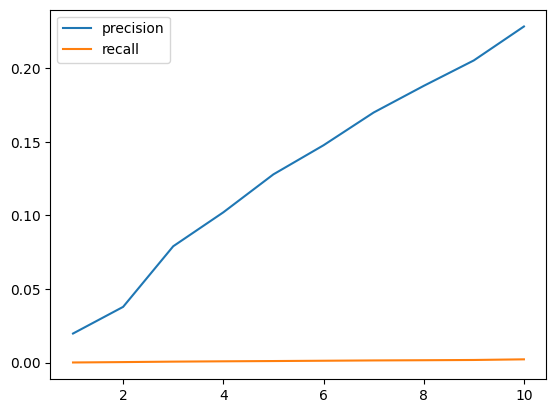

In [23]:
precision_avgs = []
recall_avgs = []

# iterating over the number of rules selected from the Top Rules
for k in range(1, 11):
    antecedant_descendant_mapping = {}
    top_k_rules = [rule for rule in sorted_rules[:k]]
    for rule in top_k_rules:
        antecedant_descendant_mapping[rule[0][0]] = rule[1]

    # getting all antecedants into a single set
    selected_antecedants = set(rule[0][0] for rule in top_k_rules)

    # iterating over each user in the test set
    all_precisions = []
    all_recalls = []

    print(k, selected_antecedants)
    for user in test_set.keys():
        # getting all movies rated by this user from the training set
        # user_movies_from_train_set = train_set[user]

        # getting only those movies intersecting with selected antecedants
        # Iterating over antecedants of top K rules
        
        # ((X), (A,B,C), 12, 21))
        predictions = set()
        for antecedant in selected_antecedants:
            if antecedant in test_set[user]:
                print("mapping: ", antecedant, antecedant_descendant_mapping)
                for movie in antecedant_descendant_mapping[antecedant]:
                    predictions.add(movie)

        # print(user, predictions)
        # Getting set of all movies for this user from the dataset
        all_movies_for_user = set(user_movies[user])
        
        # Calculating recall
        user_recall = len(all_movies_for_user & predictions) / len(all_movies_for_user)

        # Calculating precision
        user_precision = 0
        if len(predictions) != 0:
            user_precision = len(all_movies_for_user & predictions) / len(predictions)        

        all_precisions.append(user_precision)
        all_recalls.append(user_recall)

    # calculating average precision and recall
    precision_avg_for_k = np.mean(all_precisions)
    recall_avg_for_k = np.mean(all_recalls)

    # adding to the list
    precision_avgs.append(precision_avg_for_k)
    recall_avgs.append(recall_avg_for_k)


print(precision_avgs)
print(recall_avgs)

x = [i for i in range(1, 11)]
plt.plot(x, precision_avgs, label="precision")
plt.plot(x, recall_avgs, label="recall")
plt.legend()

Decreasing Precision: On increasing the number of rules (k), the average precision is likely to decrease. This is because with more rules, we are recommending a larger set of items, and some of those recommendations may not be relevant to the user. As a result, the precision, which measures how many of the recommended items are relevant, tends to decrease as k increases.

Increasing Recall: On the other handOn increasing the number of rules (e) N, the average recall is likely to increase. This is because with more rulesweou are recommending a larger set of items, which is more likely to include some of the relevant items from the test set. Recall measures how many of the relevant items are included in the recommendations, and aweou provide more recommendationsweou are more likely to cover a larger portion of the relevant items.

Trade-off Between Precision and Recall: The graph will likely show a trade-off between precision and recall. Wwe you have fewer rules (loker we you have a higher precision but a lower recall, and wwe you have more rules (higker we you have a higher recall but a lower precisces.

## Part 4